# Code for creating Figure 1

In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pymodulon.compare import *
from tqdm.notebook import tqdm
from matplotlib_venn import venn3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('ticks')
matplotlib.rcParams['text.color'] = '#000000'
matplotlib.rcParams['axes.labelcolor'] = '#000000'
matplotlib.rcParams['xtick.color'] = '#000000'
matplotlib.rcParams['ytick.color'] = '#000000'

In [2]:
# Load ICA object 
ica_PS = load_json_model('p_syringae_2.json')

### Figure 1A: 
Obtained from https://doi.org/10.1101/2021.07.01.450581

### Figure 1B 
Created on BioRender (https://biorender.com/)

### Figure 1C
Created on Microsoft Excel (https://www.microsoft.com/en-us/microsoft-365/excel)

### Figure 1D

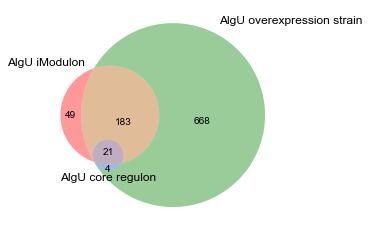

In [4]:
venn3(subsets = (49, 668, 183, 0, 0, 4, 21), set_labels = ('AlgU iModulon', 'AlgU overexpression strain','AlgU core regulon'))

## Figure 1E
Created on Biorender (https://biorender.com/)

# Figure 1F
#### AlgU activity plots

C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\pymodulon\plotting.py:111: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bar_vals = metadata.groupby("x").mean()


<AxesSubplot: ylabel='AlgU iModulon\nActivity'>

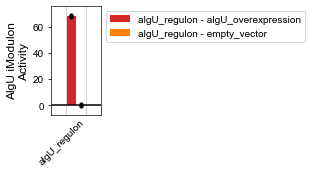

In [5]:
plot_activities(ica_PS, 'AlgU', projects = 'algU_regulon')

(-15.0, 70.0)

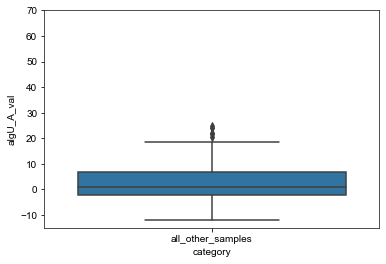

In [6]:
# creating a dataframe of all samples, activity level in the AlgU iModulon, and category (AlgU deletion strain --> del_algU;
# AlgU overexpression strain --> algU_overexpression; all oher samples --> all other samples)

algU_df = pd.DataFrame(columns = ['sample','algU_A_val','category'])
algU_df['sample'] = ica_PS.sample_table.index.values

for idx, row in algU_df.iterrows():
    algU_df.loc[idx, 'algU_A_val'] = ica_PS.A.loc['AlgU',algU_df.loc[idx, 'sample']]
    if ica_PS.sample_table.loc[algU_df.loc[idx, 'sample'], 'condition_name'] == 'algU_overexpression':
        algU_df.loc[idx, 'category'] = 'algU_overexpression'
    elif ica_PS.sample_table.loc[algU_df.loc[idx, 'sample'], 'condition_name'] == 'empty_vector':
        algU_df.loc[idx, 'category'] = 'del_algU'
    else:
        algU_df.loc[idx, 'category'] = 'all_other_samples'

# plotting boxplot 

ax =sns.boxplot(data = algU_df, y = 'algU_A_val', x = 'category', order = ['all_other_samples'])
ax.set_ylim([-15, 70])